In [61]:
import pandas as pd

In [62]:
df = pd.read_csv("Sms.csv", sep=';', on_bad_lines = 'skip')

In [63]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [64]:
df['label'].value_counts()

ham     4487
spam     746
Name: label, dtype: int64

In [78]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, plot_roc_curve
import matplotlib.pyplot as plt

In [79]:
lemmatizer = WordNetLemmatizer()
stopwords = set(stopwords.words('english'))

def lowercasing(msg):
    msg = msg.lower()
    return msg

In [80]:
def preprocessing(msg):
    msg = msg.lower()
    #lemmatization 
    nltk_pos = [tag[1] for tag in pos_tag(word_tokenize(msg))]
    msg = [tag[0] for tag in pos_tag(word_tokenize(msg))]
    #translating nltk pos to wordnet (they both have different Knowledge bases)
    wnpos = ['a' if tag[0] == 'J' else tag[0].lower() if tag[0] in ['N', 'R', 'V'] else 'n' for tag in nltk_pos]
    msg = " ".join([lemmatizer.lemmatize(word, wnpos[i]) for i, word in enumerate(msg)])
    msg = [word for word in msg.split() if word not in stopwords]
    return msg

In [81]:
df['text'] = df['text'].apply(lowercasing)
#70-30 split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size = 0.1, random_state = 1)
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)


              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       437
        spam       1.00      0.89      0.94        87

    accuracy                           0.98       524
   macro avg       0.99      0.94      0.96       524
weighted avg       0.98      0.98      0.98       524



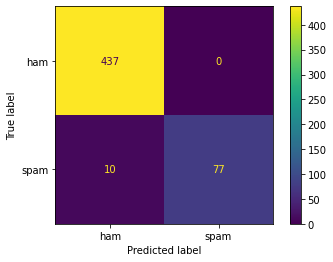

In [82]:
# SVM 
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)

# Testing  
X_test = vectorizer.transform(X_test)
y_pred = svm.predict(X_test) 

#evaluation
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=svm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm.classes_)
disp.plot()
plt.show()
